## To Dos
### Statistics about the dataset
### Handle NaNs 
### Encode Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df.head()

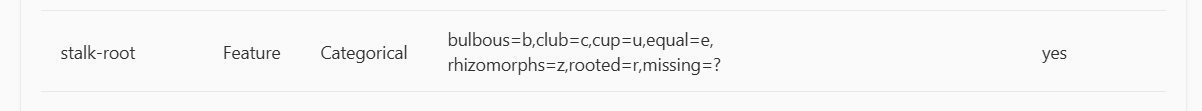

In [3]:
#handle '?' values in Stalk Root
if 'stalk-root' in df.columns:
    df['stalk-root'] = df['stalk-root'].replace('?', np.nan)

# Drop rows with missing values
df_cleaned = df.dropna()


In [ ]:
# Separate imput features and target class
y = df_cleaned['class']
X = df_cleaned.drop('class', axis=1)

In [ ]:
X.describe()#(5644,22)

In [ ]:
y.describe()#(5644,1)

In [26]:
# Encode input categorical features using OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
"""
When set to ‘use_encoded_value’, the encoded value of unknown categories will be 
set to the value given for the parameter unknown_value


When the parameter handle_unknown is set to ‘use_encoded_value’,
this parameter is required and will set the encoded value of unknown categories.

"""

X_encoded = ordinal_encoder.fit_transform(X)
"""

The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
The fit_transform() method does both fits and transform.

"""


X_encoded = pd.DataFrame(X_encoded, columns=X.columns, index=X.index)


In [32]:

# Encode output class variable using LabelEncoder
target_encoder = LabelEncoder()
#Encode target labels with value between 0 and n_classes-1.
y_encoded = target_encoder.fit_transform(y)
y_enc = pd.DataFrame(y_encoded)

In [33]:
X_encoded.to_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\parameters.csv")
y_enc.to_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\labels.csv")

In [4]:
dump(ordinal_encoder, r"C:\Users\jaken\Documents\mushroom_classification\models\ordinal_encoder.pkl") 
dump(target_encoder, r"C:\Users\jaken\Documents\mushroom_classification\models\target_encoder.pkl")

NameError: name 'ordinal_encoder' is not defined